### PROYECTO FINAL: NOELIA FELIPE RAMIREZ

#### Como primer paso importamos  las librerias necesarias

In [55]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lectura del archivo

#### Se realizo la carga de archivo csv

In [56]:
datos = pd.read_csv('PARAISO_DE_HOJAS_VERDES_1.csv', sep=';')
datos

,Fecha de compra,Nombre de cliente,Celular,Planta de interior,Planta de exterior,Cantidad de plantas compradas,Total precio de compra,Transportadora de envio,Destino,Costo de envio
0,8/1/2025,Orellana Pao,73731155,7,2,9,300,trans Lupjansa,La Paz,50
1,13/1/2025,Coro Vedia Maria Fernanda,78712439,1,1,2,50,trans Bolivar,Potosi,15
2,13/1/2025,Quispe Veronica,76985321,7,1,8,800,Trans Illimani,Illimani,50
3,13/1/2025,Cordova Mercedes,72451845,8,3,11,346,tran Bolivar,Sucre,20
4,13/1/2025,Yovana Mollo,65372345,4,2,6,234,trans omar,Uyuni,50
...,...,...,...,...,...,...,...,...,...,...
111,23/4/2025,Torrez Claudia,72832131,6,6,12,300,trans Lupjansa,La Paz,25
112,23/4/2025,Apaza Belen,63874468,9,2,11,350,trans Lupjansa,Oruro,25
113,23/4/2025,Rodriguez Imana,71559280,3,3,6,90,trans Lupjansa,La Paz,20
114,23/4/2025,Machicado Javier,65874890,8,5,13,190,trans Lupjansa,La Paz,25


### Verificamos cuantas columnas y filas existen en el archivo csv

In [57]:
datos.shape

(116, 10)

### 2.-Descripcion de la fuente de datos (Mark down)

Los datos provienen del dataset del vivero "Paraíso de Hojas Verdes", que contiene información sobre las compras realizadas por los clientes, incluyendo la fecha de compra, el nombre del cliente, número de celular, tipo de planta adquirida (interior o exterior), cantidad de plantas compradas, total pagado

### 3.-Descripcion de las variables (Categoricas, Cuantitativas (discretas y continuas))¶¶


**Variables Categóricas:**

**Nombre de cliente:** Categórica nominal  
Identifica al cliente que realizó la compra. No tiene un orden lógico.

**Celular:** Categórica nominal (aunque es numérico, no representa una cantidad)  

**Transportadora de envío:** Categórica nominal

**Destino:** Categórica nominal  
Departamento donde se entregara las plantas  


**Variables Cuantitativas discretas:**  
**Cantidad de plantas compradas:** Discreta  
Total de plantas (suma de interior y suma de exterior)  

**Planta de interior** Discreta  
Numero de plantas de interior compradas  

**Planta de exterior** Discreta  
Numero de plantas de exterior compradas


**Variables Cuantitativas continuas:**  
**Total precio de compra:** continua (puede tener decimales)  
Monto total de la compra

**Costo de envío:** continua
Precio pagado por el envio


**Variable de tipo fecha:**  
**Fecha de compra:** variable temporal (puede analizarse como categórica ordinal o separarse en día/mes/año para distintos análisis)



### 4.-tratamiento de nulos 

no se encontro datos nulos

In [58]:
datos.isnull().sum()

Fecha de compra                   0
Nombre de cliente                 0
Celular                           0
Planta de interior                0
Planta de exterior                0
Cantidad de plantas compradas     0
Total precio de compra            0
Transportadora de envio           0
Destino                           0
Costo de envio                    0
dtype: int64

#### 5.-Verificamos a detalle la informacion del dataset

In [59]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Fecha de compra                 116 non-null    object
 1   Nombre de cliente               116 non-null    object
 2   Celular                         116 non-null    int64 
 3   Planta de interior              116 non-null    int64 
 4   Planta de exterior              116 non-null    int64 
 5   Cantidad de plantas compradas   116 non-null    int64 
 6   Total precio de compra          116 non-null    int64 
 7   Transportadora de envio         116 non-null    object
 8   Destino                         116 non-null    object
 9   Costo de envio                  116 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 9.2+ KB


### 6.-Analice 2 variables y determine sus estadisticos de tendencia central y dispersión.

In [10]:
datos.describe()

,Celular,Planta de interior,Planta de exterior,Cantidad de plantas compradas,Total precio de compra,Costo de envio
count,1.160000e+02,116.000000,116.000000,116.000000,116.000000,116.000000
mean,7.165612e+07,4.905172,2.784483,7.689655,135.051724,24.655172
std,4.886400e+06,2.268800,1.826406,3.071365,91.319396,8.615561
min,6.232752e+07,1.000000,1.000000,2.000000,35.000000,15.000000
25%,6.744674e+07,3.000000,1.000000,5.000000,83.750000,20.000000
50%,7.283213e+07,5.000000,2.000000,8.000000,115.000000,20.000000
75%,7.549663e+07,7.000000,3.250000,10.000000,170.000000,25.000000
max,7.959006e+07,10.000000,8.000000,16.000000,800.000000,60.000000


### 7.- Realizamos un analisis de la media y mediana de la **cantidad de plantas compradas** 

In [60]:
datos.columns = datos.columns.str.strip()

In [61]:
mode_Entidad = datos['Cantidad de plantas compradas'].mode()[0]

In [64]:
tendencia_central = datos['Cantidad de plantas compradas'].agg(['mean','median'])
tendencia_central

mean      7.689655
median    8.000000
Name: Cantidad de plantas compradas, dtype: float64

In [65]:
cuartil25 = datos['Cantidad de plantas compradas'].quantile(0.25)
cuartil75 = datos['Cantidad de plantas compradas'].quantile(0.75)
dispersion = datos['Cantidad de plantas compradas'].agg(['std','min','max'])
cuartiles = pd.Series({'25%': cuartil25, '75%': cuartil25})

dispersionCompleta = pd.concat([dispersion, cuartiles]).to_frame('Tendencia de dispersión: Cantidad de plantas compradas')

dispersionCompleta

,Tendencia de dispersión: Cantidad de plantas compradas
std,3.071365
min,2.000000
max,16.000000
25%,5.000000
75%,5.000000


Analizamos la tendensia de l columna **total precio de compra** para luego sacar la frecuencia relativa y valor absoluto 

In [66]:
tendencia_central = datos['Total precio de compra'].agg(['mean','median'])
tendencia_central

mean      135.051724
median    115.000000
Name: Total precio de compra, dtype: float64

In [67]:
pd.crosstab(index=datos['Total precio de compra'], columns='Frecuencia_Absoluta').assign(Frecuencia_Relativa=lambda x: x / x.sum()).sort_values(by='Frecuencia_Relativa', ascending=False).reset_index()

col_0,Total precio de compra,Frecuencia_Absoluta,Frecuencia_Relativa
0,180,9,0.077586
1,90,9,0.077586
2,100,7,0.060345
3,80,6,0.051724
4,130,5,0.043103
5,115,5,0.043103
6,150,5,0.043103
7,60,4,0.034483
8,170,4,0.034483
9,70,4,0.034483


### 8.-Elaborar de datos con GROUP BY con la fila **Nombre de cliente y Cantidad de plantas compradas**

In [68]:
pd.set_option('display.max_rows', 50)

df1 = datos[['Nombre de cliente','Cantidad de plantas compradas','Total precio de compra']] #En este caso la popularidad puede estár dada por mezcla de géneros, por lo cual no es conveniente separar los géneros
df1.groupby(['Nombre de cliente','Cantidad de plantas compradas'], as_index=False).agg(['mean','sum'])

Nombre de cliente Cantidad de plantas compradas Total precio de compra  \
                                                                      mean   
0      Aguilar Mirian                             9                  100.0   
1        Alave Belen                              6                  120.0   
2      Alvarez Greysi                             7                  100.0   
3      Alvarez Greysi                            10                  100.0   
4    Americo Oropeza                             11                  185.0   
..                ...                           ...                    ...   
106       Usmayo Lucy                            10                  115.0   
107     Vasquez Maria                             7                  130.0   
108      Yovana Mollo                             6                  234.0   
109       Zarate Olga                             4                   60.0   
110       wolf Jahira                             2                   50.0   

          
     sum  
0    100  
1    120  
2    100  
3    100  
4    185  
..   ...  
106  115  
107  130  
108  234  
109   60  
110   50  

[111 rows x 4 columns]

### 9.- Realizaco 6 graficas para obtener algunas concluciones y sacar resultados 

### Grafico 1

**Análisis del Gráfico: Total de Ventas por Departamento de Destino**  
El gráfico muestra el total de ingresos por ventas (en bolivianos) según el departamento de destino de las plantas. A partir de los datos agrupados, se pueden observar diferencias significativas en la distribución de las ventas, lo que permite identificar tendencias de mercado.

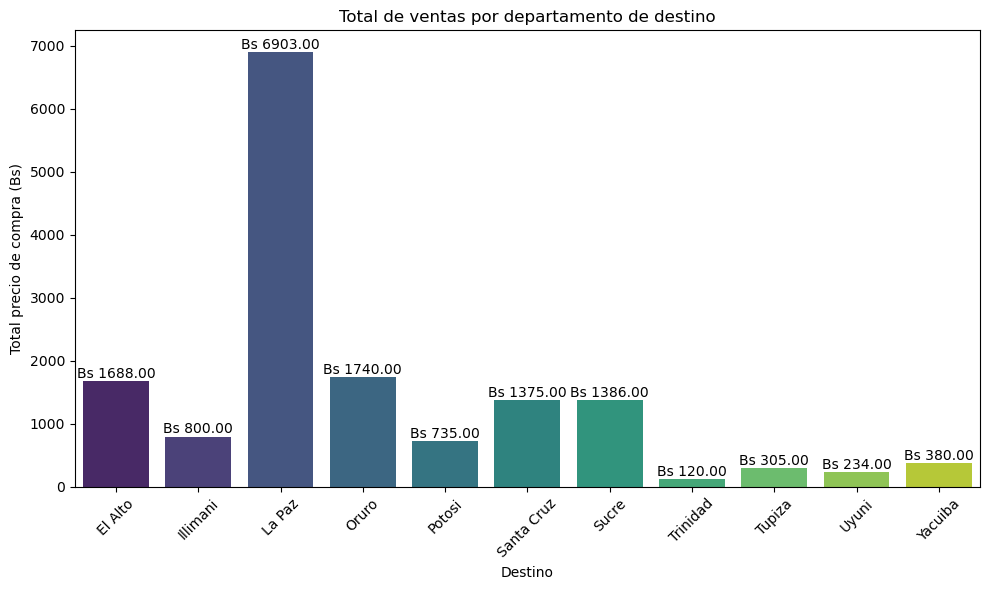

In [69]:
# Agrupar los datos
df_ventas_por_destino = datos.groupby('Destino')['Total precio de compra'].sum().reset_index()

# Crear gráfico
plt.figure(figsize=(10,6))
grafico = sns.barplot(data=df_ventas_por_destino, x='Destino', y='Total precio de compra', palette='viridis')

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Título y etiquetas con "Bs" en lugar de "USD"
plt.title('Total de ventas por departamento de destino')
plt.ylabel('Total precio de compra (Bs)')
plt.xlabel('Destino')

# Añadir etiquetas numéricas encima de cada barra con "Bs"
for index, row in df_ventas_por_destino.iterrows():
    grafico.text(index, row['Total precio de compra'] + 1, f"Bs {row['Total precio de compra']:.2f}", 
                 ha='center', va='bottom', fontsize=10)

# Ajustar layout
plt.tight_layout()
plt.show()


### Grafica 2

**Análisis del Gráfico: Evolución del Total de Ventas en el Tiempo**  
El gráfico representa la evolución diaria del total de ventas (expresado en bolivianos si deseas adaptar el eje) a lo largo del tiempo, permitiendo identificar tendencias, patrones estacionales y posibles irregularidades en el comportamiento del mercado.

In [70]:
datos['Fecha de compra'] = pd.to_datetime(datos['Fecha de compra'], dayfirst=True, errors='coerce')

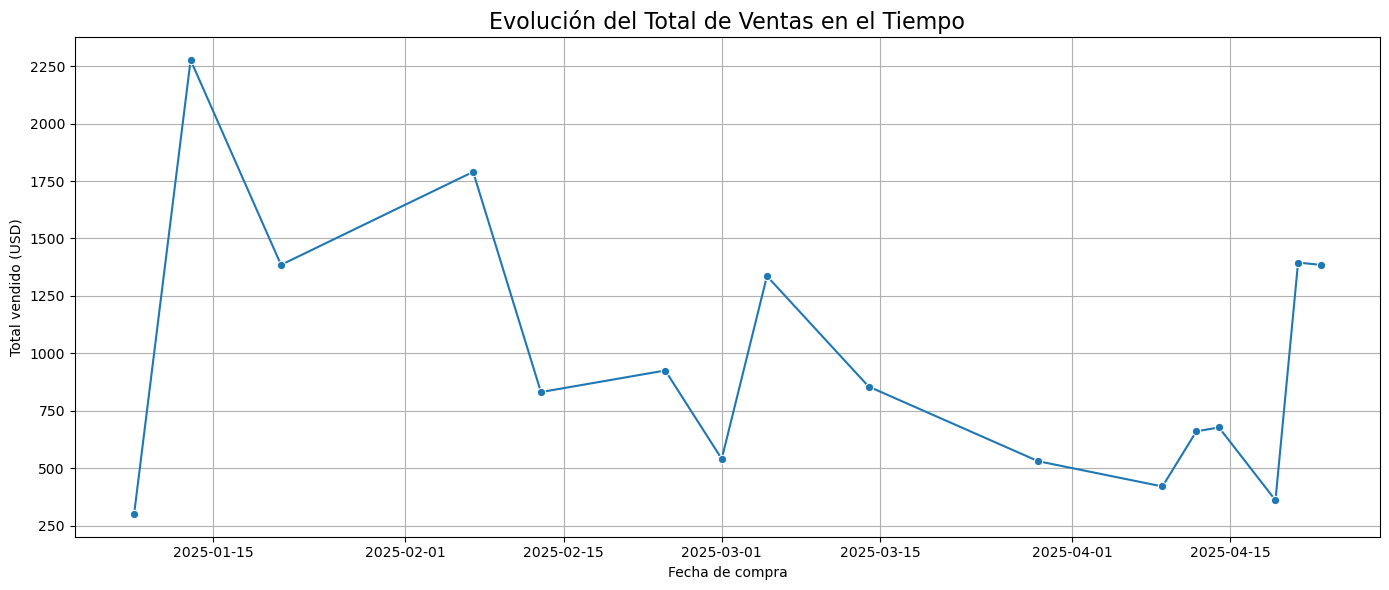

In [71]:
datos['Fecha de compra'] = pd.to_datetime(datos['Fecha de compra'])

# Agrupar por fecha
ventas_diarias = datos.groupby('Fecha de compra')['Total precio de compra'].sum().reset_index()

# Graficar línea de tiempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_diarias, x='Fecha de compra', y='Total precio de compra', marker='o')
plt.title('Evolución del Total de Ventas en el Tiempo', fontsize=16)
plt.xlabel('Fecha de compra')
plt.ylabel('Total vendido (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Grafico 3

**Análisis del Gráfico: Preferencia de Clientes – Plantas de Interior vs. Exterior**
Este gráfico muestra cómo se distribuyen las preferencias de los clientes entre plantas de interior, exterior, o si compraron la misma cantidad de ambos tipos. Los datos se expresan tanto en cantidad de clientes como en porcentaje sobre el total analizado.

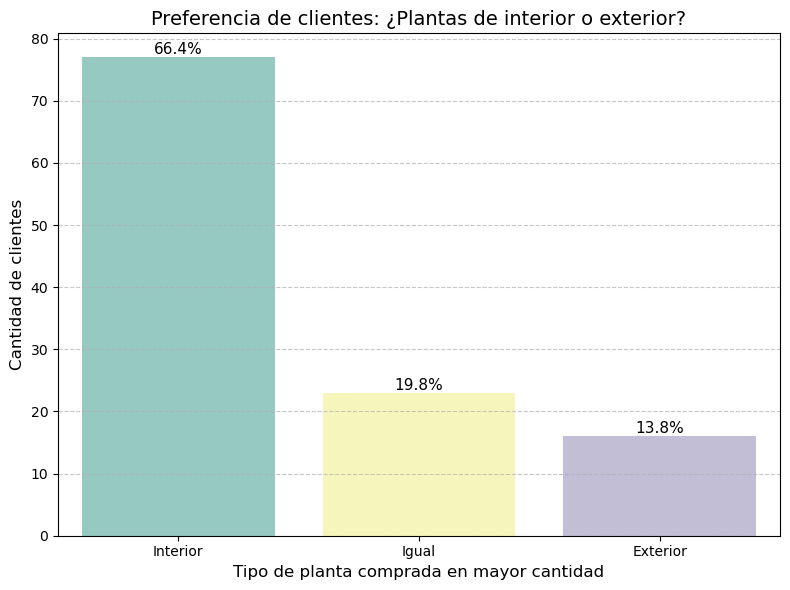

In [72]:
# Crear una nueva columna para indicar qué tipo de planta compró más cada cliente
datos['Tipo de planta preferida'] = datos.apply(
    lambda row: 'Interior' if row['Planta de interior'] > row['Planta de exterior']
    else ('Exterior' if row['Planta de exterior'] > row['Planta de interior'] else 'Igual'),
    axis=1
)

# Contar cuántos clientes prefieren cada tipo
preferencias = datos['Tipo de planta preferida'].value_counts().reset_index()
preferencias.columns = ['Tipo de planta', 'Cantidad de clientes']

# Calcular el total para convertir a porcentaje
total_clientes = preferencias['Cantidad de clientes'].sum()
preferencias['Porcentaje'] = (preferencias['Cantidad de clientes'] / total_clientes) * 100

# Graficar
plt.figure(figsize=(8,6))
grafico = sns.barplot(data=preferencias, x='Tipo de planta', y='Cantidad de clientes', palette='Set3')

# Agregar etiquetas con porcentajes en cada barra
for i, row in preferencias.iterrows():
    grafico.text(i, row['Cantidad de clientes'] + 0.5, f"{row['Porcentaje']:.1f}%", ha='center', fontsize=11)

plt.title('Preferencia de clientes: ¿Plantas de interior o exterior?', fontsize=14)
plt.xlabel('Tipo de planta comprada en mayor cantidad', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Grafica 4

**Análisis del Gráfico: Top 5 Clientes por Cantidad de Plantas Compradas**  
El gráfico presenta a los cinco clientes que han comprado la mayor cantidad total de plantas, lo que permite identificar a los compradores más importantes en términos de volumen.

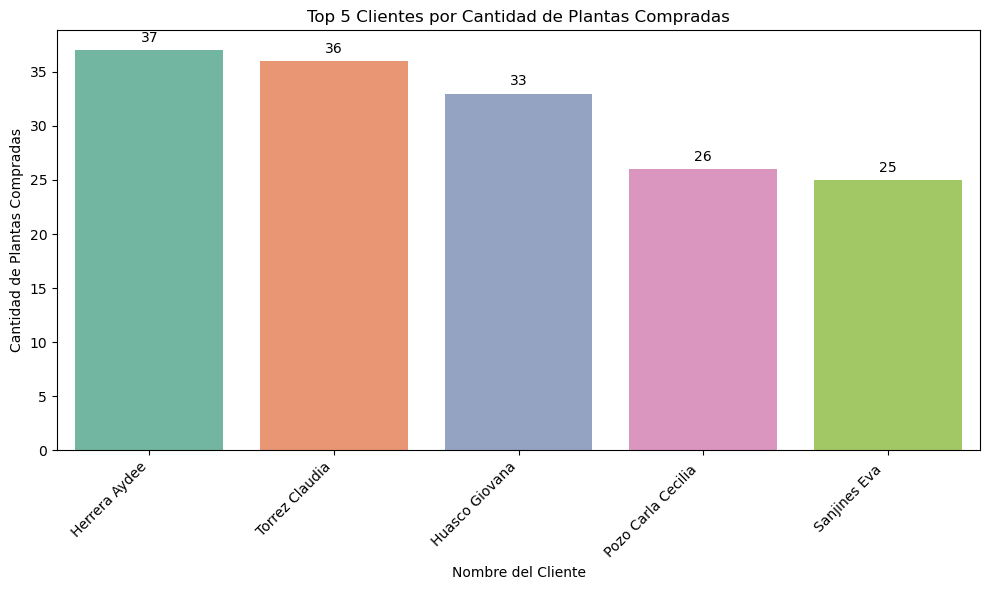

In [73]:
# Agrupar y ordenar por cantidad total de plantas compradas
top_clientes = (datos.groupby('Nombre de cliente')['Cantidad de plantas compradas']
                .sum()
                .sort_values(ascending=False)
                .head(5)
                .reset_index())

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_clientes, x='Nombre de cliente', y='Cantidad de plantas compradas', palette='Set2')

# Agregar etiquetas con la cantidad exacta encima de cada barra
for i, row in top_clientes.iterrows():
    ax.text(i, row['Cantidad de plantas compradas'] + 0.5, int(row['Cantidad de plantas compradas']), 
            ha='center', va='bottom')

# Ajustes de presentación
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Clientes por Cantidad de Plantas Compradas')
plt.xlabel('Nombre del Cliente')
plt.ylabel('Cantidad de Plantas Compradas')
plt.tight_layout()
plt.show()


### Grafico 5

**Análisis del Gráfico: Top 5 Clientes por Total de Compra**  
El gráfico muestra a los cinco clientes que más han invertido en compras de plantas, expresado en bolivianos (Bs). Este enfoque permite identificar no solo a quienes compran en mayor cantidad, sino a aquellos que generan mayor ingreso monetario, lo cual es crucial para la rentabilidad del negocio.

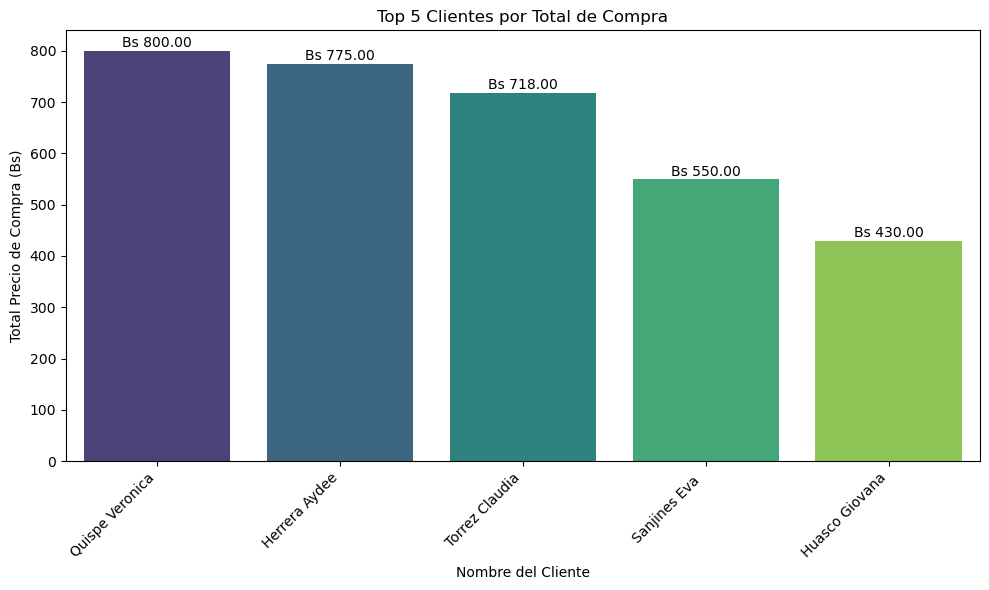

In [74]:
# Agrupar y ordenar por total de precio de compra
top_clientes_precio = (datos.groupby('Nombre de cliente')['Total precio de compra']
                       .sum()
                       .sort_values(ascending=False)
                       .head(5)
                       .reset_index())

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_clientes_precio, x='Nombre de cliente', y='Total precio de compra', palette='viridis')

# Etiquetas exactas del total en cada barra con "Bs" en lugar de "USD"
for i, row in top_clientes_precio.iterrows():
    ax.text(i, row['Total precio de compra'] + 1, f"Bs {row['Total precio de compra']:.2f}", 
            ha='center', va='bottom', fontsize=10)

# Ajustes visuales
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Clientes por Total de Compra')
plt.xlabel('Nombre del Cliente')
plt.ylabel('Total Precio de Compra (Bs)')
plt.tight_layout()
plt.show()


### Grafico 6

**Análisis del Gráfico: Preferencia de Plantas por Destino**  
Este gráfico de barras agrupadas muestra la cantidad total de plantas de interior y exterior compradas en cada destino. Es útil para identificar preferencias regionales y ajustar la oferta según la demanda específica de cada departamento o localidad.

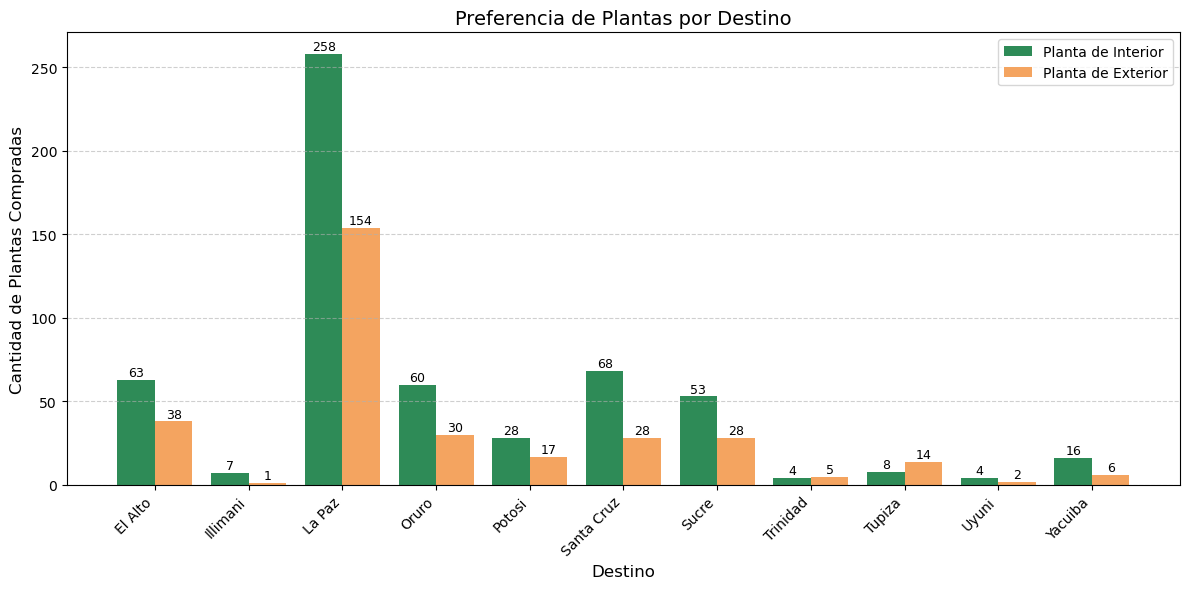

In [75]:
# Asegúrate de que las columnas estén en formato correcto (números)
datos['Planta de interior'] = pd.to_numeric(datos['Planta de interior'], errors='coerce')
datos['Planta de exterior'] = pd.to_numeric(datos['Planta de exterior'], errors='coerce')

# Agrupar por destino y sumar la cantidad de plantas interiores y exteriores
preferencias = datos.groupby('Destino')[['Planta de interior', 'Planta de exterior']].sum().reset_index()

# Crear gráfico de barras agrupadas
plt.figure(figsize=(12,6))
bar_width = 0.4
x = range(len(preferencias))

# Barras de plantas de interior
bars1 = plt.bar(x, preferencias['Planta de interior'], width=bar_width, label='Planta de Interior', color='seagreen')

# Barras de plantas de exterior
bars2 = plt.bar([p + bar_width for p in x], preferencias['Planta de exterior'], width=bar_width, label='Planta de Exterior', color='sandybrown')

# Etiquetas de cantidad exacta encima de cada barra
for i, value in enumerate(preferencias['Planta de interior']):
    plt.text(i, value + 0.5, int(value), ha='center', va='bottom', fontsize=9)

for i, value in enumerate(preferencias['Planta de exterior']):
    plt.text(i + bar_width, value + 0.5, int(value), ha='center', va='bottom', fontsize=9)

# Etiquetas
plt.xlabel('Destino', fontsize=12)
plt.ylabel('Cantidad de Plantas Compradas', fontsize=12)
plt.title('Preferencia de Plantas por Destino', fontsize=14)
plt.xticks([p + bar_width/2 for p in x], preferencias['Destino'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Prediccion de ventas 

In [53]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



09:07:07 - cmdstanpy - INFO - Chain [1] start processing
09:07:07 - cmdstanpy - INFO - Chain [1] done processing


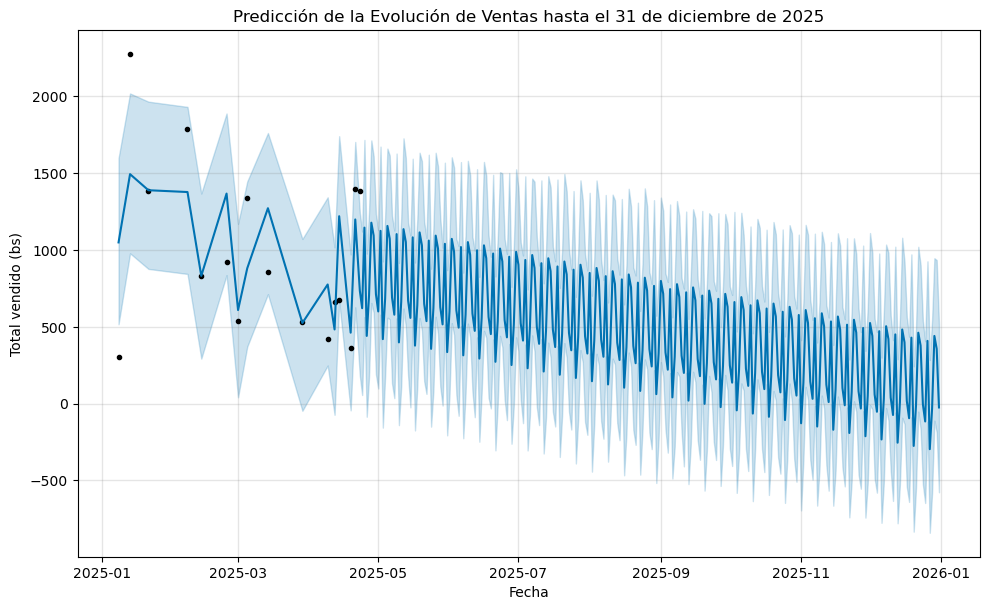

In [79]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar formato correcto para Prophet
df = ventas_diarias.rename(columns={'Fecha de compra': 'ds', 'Total precio de compra': 'y'})

# Crear y entrenar el modelo
modelo = Prophet(daily_seasonality=True)
modelo.fit(df)

# Crear fechas futuras hasta el 31 de diciembre de 2025
fecha_final = pd.to_datetime('2025-12-31')
dias_a_predecir = (fecha_final - df['ds'].max()).days
futuro = modelo.make_future_dataframe(periods=dias_a_predecir)

# Realizar la predicción
prediccion = modelo.predict(futuro)

# Graficar la predicción
modelo.plot(prediccion)
plt.title('Predicción de la Evolución de Ventas hasta el 31 de diciembre de 2025')
plt.xlabel('Fecha')
plt.ylabel('Total vendido (bs)')
plt.grid(True)
plt.show()

09:06:49 - cmdstanpy - INFO - Chain [1] start processing
09:06:50 - cmdstanpy - INFO - Chain [1] done processing


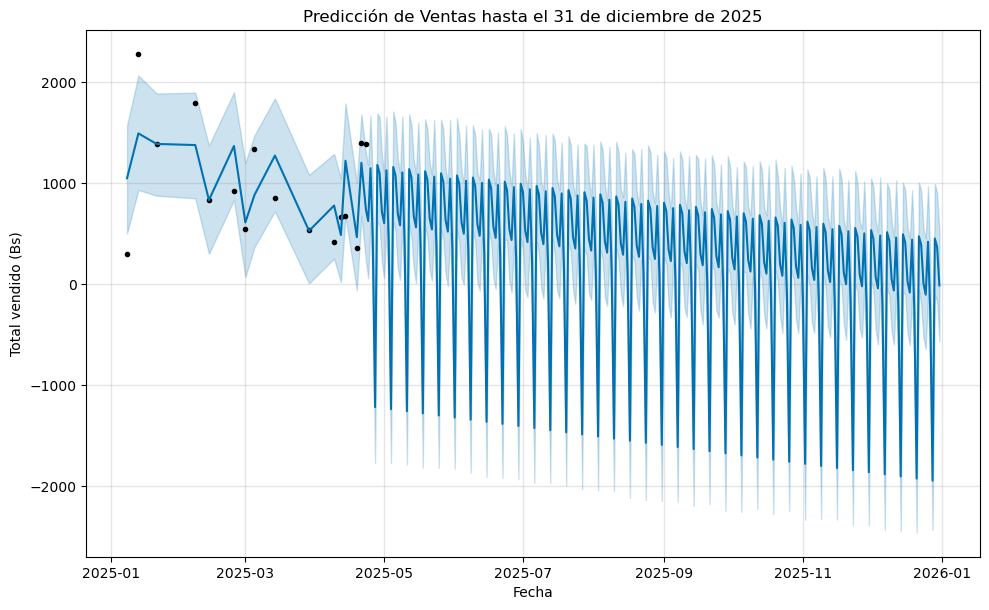

In [78]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Renombrar columnas según formato requerido por Prophet
df = ventas_diarias.rename(columns={'Fecha de compra': 'ds', 'Total precio de compra': 'y'})

# Crear y ajustar el modelo
modelo = Prophet()
modelo.fit(df)

# Crear marco de datos futuro hasta 31 de diciembre de 2025
futuro = modelo.make_future_dataframe(periods=(pd.to_datetime('2025-12-31') - df['ds'].max()).days)

# Predecir valores futuros
prediccion = modelo.predict(futuro)

# Graficar predicción
modelo.plot(prediccion)
plt.title('Predicción de Ventas hasta el 31 de diciembre de 2025')
plt.xlabel('Fecha')
plt.ylabel('Total vendido (Bs)')
plt.grid(True)
plt.show()

04:31:11 - cmdstanpy - INFO - Chain [1] start processing
04:31:44 - cmdstanpy - INFO - Chain [1] done processing


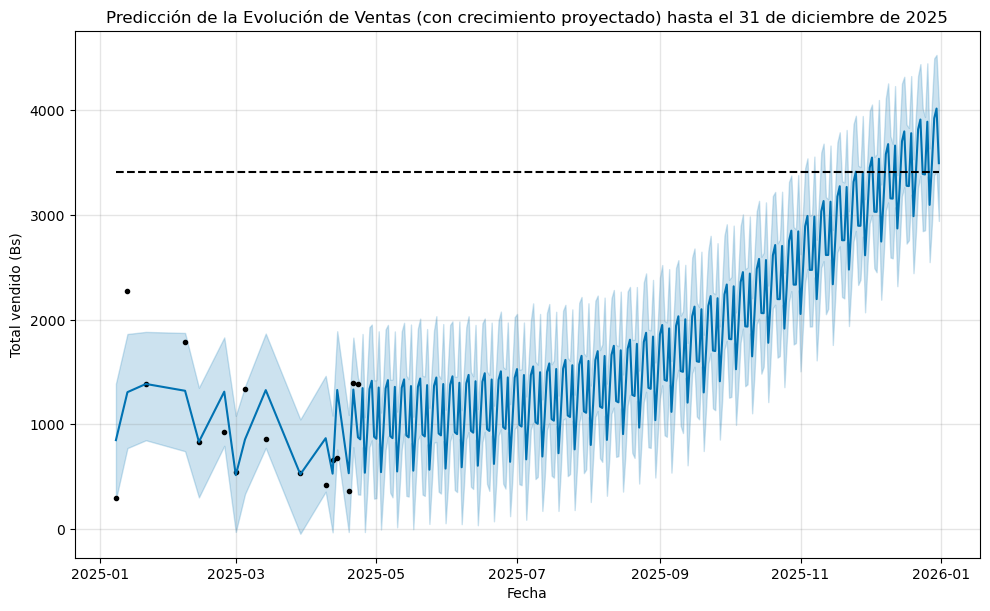

In [80]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar formato correcto para Prophet
df = ventas_diarias.rename(columns={'Fecha de compra': 'ds', 'Total precio de compra': 'y'})

# Estimar un valor tope razonable para las ventas (capacidad máxima esperada)
capacidad_maxima = df['y'].max() * 1.5  # Puedes ajustar este valor según tu criterio
df['cap'] = capacidad_maxima

# Crear el modelo con crecimiento logístico
modelo = Prophet(growth='logistic', daily_seasonality=True)
modelo.fit(df)

# Crear fechas futuras
fecha_final = pd.to_datetime('2025-12-31')
dias_a_predecir = (fecha_final - df['ds'].max()).days
futuro = modelo.make_future_dataframe(periods=dias_a_predecir)

# Asignar también la capacidad a los datos futuros
futuro['cap'] = capacidad_maxima

# Realizar la predicción
prediccion = modelo.predict(futuro)

# Graficar la predicción
modelo.plot(prediccion)
plt.title('Predicción de la Evolución de Ventas (con crecimiento proyectado) hasta el 31 de diciembre de 2025')
plt.xlabel('Fecha')
plt.ylabel('Total vendido (Bs)')
plt.grid(True)
plt.show()